# 第二次作业
## 1.计算协方差

In [1]:
import numpy as np

#导入数据
X = np.array([152, 185, 169, 172, 174, 168, 180])
Y = np.array([92, 162, 125, 118, 122, 135, 168])

#计算协方差
cov = np.cov(X, Y, ddof=0)[0, 1]
# 计算相关系数
corr = np.corrcoef(X, Y)[0, 1]

#输出结果
print(f"协方差: {cov:.2f}")
print(f"相关系数: {corr:.3f}")

协方差: 209.41
相关系数: 0.886


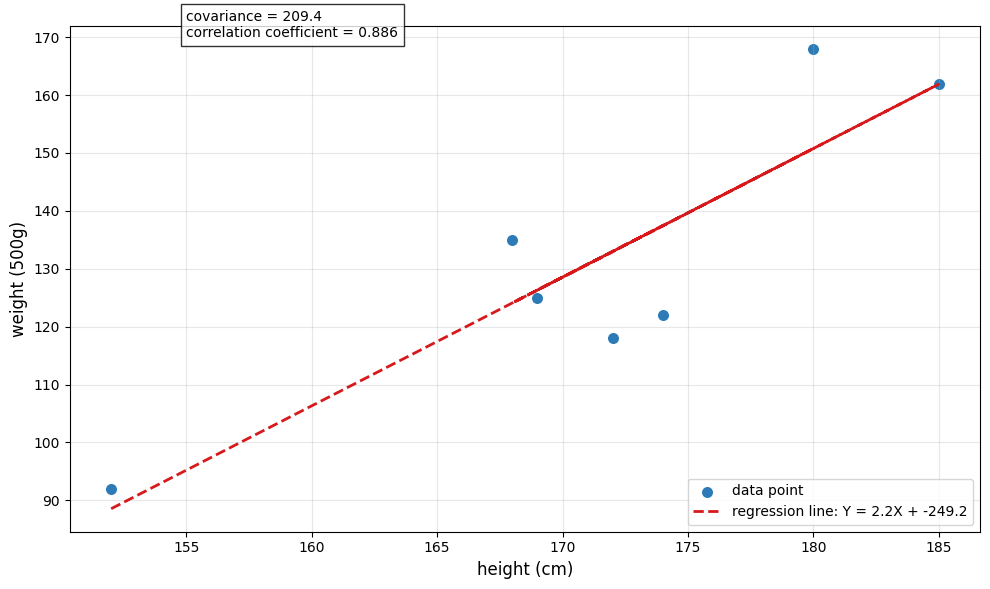

In [2]:
#散点图可视化
import matplotlib.pyplot as plt

# 计算回归线参数
slope, intercept = np.polyfit(X, Y, 1)
regression_line = slope * X + intercept

# 创建画布
plt.figure(figsize=(10, 6), dpi=100)

# 绘制散点图
plt.scatter(X, Y, color='#2c7bb6', s=80, label='data point', edgecolor='w')

# 绘制回归线
plt.plot(X, regression_line, '--', color='#d7191c', lw=2, 
         label=f'regression line: Y = {slope:.1f}X + {intercept:.1f}')

# 添加统计值
cov = np.cov(X, Y, ddof=0)[0, 1]
corr = np.corrcoef(X, Y)[0, 1]
plt.text(155, 170, f'covariance = {cov:.1f}\ncorrelation coefficient = {corr:.3f}', 
         bbox={'facecolor':'white', 'alpha':0.8})

# 图表装饰
#plt.title("身高与体重关系分析\n(体重单位：500g)", fontsize=14, pad=20)
#中文标注无法正常显示，故改为英文
plt.xlabel("height (cm)", fontsize=12)
plt.ylabel("weight (500g)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# 显示图表
plt.show()

## 2.P169 第5题

In [3]:
#对age数据做三类规范化
import numpy as np
#导入数据
age_data = [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 30, 33, 33, 35, 35, 36, 40, 45, 46, 52, 70]

# 最大-最小规约化
min_val = float(np.min(age_data))
max_val = float(np.max(age_data))
min_max_normalized = [float(x - min_val) / (max_val - min_val) for x in age_data]

# Z-score规范化
mean = float(np.mean(age_data))
std = float(np.std(age_data, ddof=1))  # 样本标准差
z_score_normalized = [float(x - mean) / std for x in age_data]

# 小数定标规范化
max_abs = max(abs(x) for x in age_data)
k = len(str(int(max_abs)))  # 计算10的幂次
decimal_scaled = [x / (10**k) for x in age_data]

# 输出结果
print("最大-最小规约化结果：")
print([round(x, 4) for x in min_max_normalized])

print("\nZ-score规范化结果：")
print([round(x, 4) for x in z_score_normalized])

print("\n小数定标规范化结果：")
print([round(x, 4) for x in decimal_scaled])

最大-最小规约化结果：
[0.0, 0.0351, 0.0526, 0.0526, 0.1053, 0.1228, 0.1228, 0.1404, 0.1579, 0.1579, 0.2105, 0.2105, 0.2105, 0.2982, 0.3509, 0.3509, 0.386, 0.386, 0.4035, 0.4737, 0.5614, 0.5789, 0.6842, 1.0]

Z-score规范化结果：
[-1.2281, -1.0815, -1.0081, -1.0081, -0.7882, -0.7149, -0.7149, -0.6415, -0.5682, -0.5682, -0.3483, -0.3483, -0.3483, 0.0183, 0.2383, 0.2383, 0.3849, 0.3849, 0.4582, 0.7515, 1.1181, 1.1914, 1.6314, 2.9511]

小数定标规范化结果：
[0.13, 0.15, 0.16, 0.16, 0.19, 0.2, 0.2, 0.21, 0.22, 0.22, 0.25, 0.25, 0.25, 0.3, 0.33, 0.33, 0.35, 0.35, 0.36, 0.4, 0.45, 0.46, 0.52, 0.7]


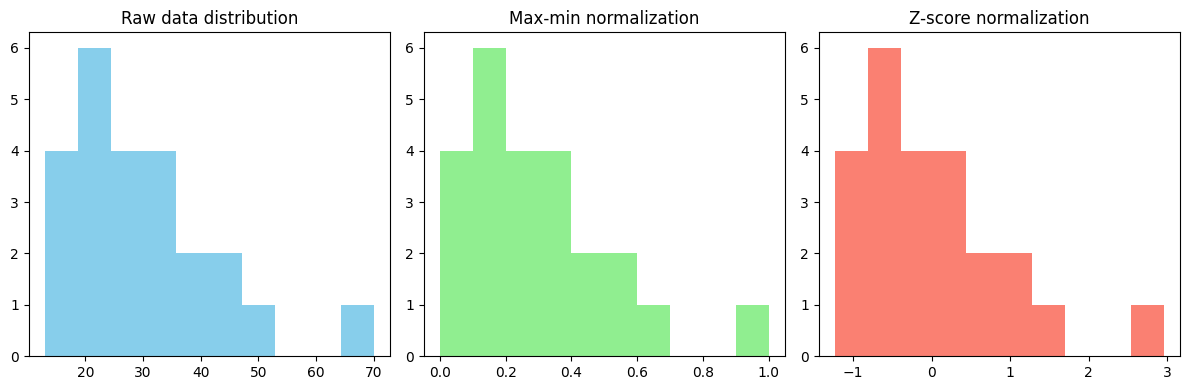

In [4]:
#直方图可视化
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4), dpi=100)

# 原始数据分布
plt.subplot(131)
plt.hist(age_data, bins=10, color='skyblue')
plt.title("Raw data distribution")

# 最大-最小规范化分布
plt.subplot(132)
plt.hist(min_max_normalized, bins=10, color='lightgreen')
plt.title("Max-min normalization")

# Z-score规范化分布
plt.subplot(133)
plt.hist(z_score_normalized, bins=10, color='salmon')
plt.title("Z-score normalization")

plt.tight_layout()
plt.show()

## 3.P169 第7题

In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [25]:
# 加载鸢尾花数据集
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [26]:
# ChiMerge算法实现
def chi_merge(feature_series, target_series, chi_threshold):
    # 准备数据：排序并创建初始区间
    data = pd.DataFrame({'feature': feature_series, 'target': target_series})
    data = data.sort_values('feature').reset_index(drop=True)
    
    # 初始化每个唯一值为一个区间
    unique_values = np.sort(data['feature'].unique())
    intervals = [[uv, uv] for uv in unique_values]
    
    # 合并循环
    while True:
        # 计算相邻区间的卡方值
        chi_values = []
        for i in range(len(intervals)-1):
            # 合并两个相邻区间
            merged = data[
                (data['feature'] >= intervals[i][0]) & 
                (data['feature'] <= intervals[i+1][1])
            ]
            
            # 构建列联表
            cont_table = pd.crosstab(
                merged['feature'].apply(lambda x: f"{intervals[i][0]}-{intervals[i+1][1]}"),
                merged['target']
            ).values
            
            # 计算卡方值
            row_sums = cont_table.sum(axis=1)
            col_sums = cont_table.sum(axis=0)
            total = cont_table.sum()
            
            expected = np.outer(row_sums, col_sums) / total
            chi = np.sum((cont_table - expected)**2 / (expected + 1e-6))  # 添加小量防止除以0
            chi_values.append(chi)
        
        # 如果没有可合并的区间或所有卡方值都超过阈值
        if not chi_values or min(chi_values) > chi_threshold:
            break
            
        # 合并最小卡方值的相邻区间
        min_index = np.argmin(chi_values)
        intervals[min_index] = [intervals[min_index][0], intervals[min_index+1][1]]
        del intervals[min_index+1]
    
    return intervals

In [27]:
# 定义卡方阈值（自由度为2，显著性水平0.05）
chi_threshold = 5.991

# 对每个特征进行离散化
discretized_intervals = {}
for feature in iris.feature_names:
    intervals = chi_merge(df[feature], df['target'], chi_threshold)
    discretized_intervals[feature] = intervals
    
    # 生成分箱边界
    bins = [interval[0] for interval in intervals] + [intervals[-1][1]]
    
    # 应用分箱
    df[f"{feature}_discrete"] = pd.cut(
        df[feature],
        bins=np.unique(bins),  # 去除重复边界
        include_lowest=True
    )

In [30]:
# 打印离散化结果
for feature in iris.feature_names:
    print(f"特征 [{feature}] 的离散化区间：")
    print([f"{x[0]:.1f}-{x[1]:.1f}" for x in discretized_intervals[feature]], "\n")

特征 [sepal length (cm)] 的离散化区间：
['4.3-7.9'] 

特征 [sepal width (cm)] 的离散化区间：
['2.0-4.4'] 

特征 [petal length (cm)] 的离散化区间：
['1.0-6.9'] 

特征 [petal width (cm)] 的离散化区间：
['0.1-2.5'] 



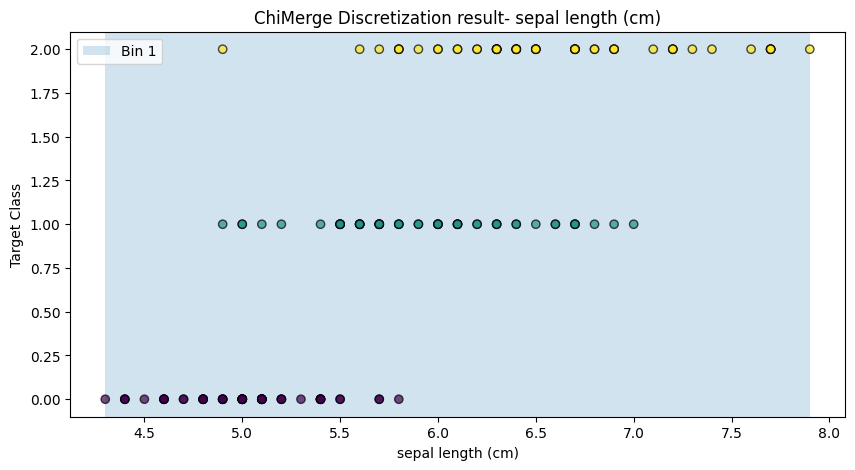

In [37]:
# 可视化第一个特征的离散化结果
feature = iris.feature_names[0]
plt.figure(figsize=(10, 5))
for i, (start, end) in enumerate(discretized_intervals[feature]):
    plt.axvspan(start, end, alpha=0.2, label=f'Bin {i+1}')

plt.scatter(
    df[feature], df['target'],
    c=df['target'], cmap='viridis', 
    edgecolor='k', alpha=0.7
)

plt.title(f"ChiMerge Discretization result- {feature}")
plt.xlabel(feature)
plt.ylabel('Target Class')
plt.legend()
plt.show()

## 4.阅读并实现教材4.6节数据处理实践
#### 使用某一个公司人力资源的数据集，通过数据挖掘来探索员工离职率与哪些因素有较强的关联

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inlineprice_discretized2

In [ ]:
df = pd.read_csv('Ch3-Turnover.csv', index_col=None)
#语法已更新
#df=pd.DataFrame.from_csv('Ch3-Turnover.csv',index_col=None)

In [ ]:
#检查是否存在缺失值
df.isnull().any()

In [ ]:
#查看数据集情况
df.head()

In [ ]:
#重命名属性，提高可读性
df=df.rename(columns={
    'satisfaction_level':'satisfaction',
    'last_evaluation':'evaluation',
    'number_project':'projectCount',
    'average_montly_hours':'averageMonthlyHours',
    'time_spend_company':'yearsAtCompany',
    'Work_accident':'workAccident',
    'promotion_lasr_Syears':'promotion',
    'sales':'department',
    'left':'turnover'
})

In [ ]:
#前置“离职率”
front=df['turnover']
df.drop(labels=['turnover'],axis=1,inplace=True)
df.insert(0,'turnover',front)
df.head()

In [ ]:
#查看数据规模
df.shape

In [ ]:
#查看数据属性
df.dtypes

In [ ]:
#计算离职率
turnover_rate=df.turnover.value_counts()/len(df)
print(turnover_rate)
#语法更新
#turnover_rate(14999,10)

In [ ]:
#计算并查看总体离职情况
turnover_Summary = df.groupby('turnover').mean(numeric_only=True)
print(turnover_Summary)
#语法有改变
#turnover_Summary=df.groupby('turnover')
#turnover_Summary.mean()

In [ ]:
#绘制相关性矩阵和热图
# 仅选择数值型列
numeric_df = df.select_dtypes(include=["number"])
# 计算相关系数矩阵
corr = numeric_df.corr()
#corr=df.corr()
#corr=(corr)
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)
corr

In [ ]:
#评价和月平均工作时数

#设置matplotlib figure格式
f,axes=plt.subplots(ncols=3,figsize=(15,6))

#Employee Satisfaction图像
sns.distplot(df.satisfaction,kde=False,color="g",ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

#Employee Evaluation
sns.distplot(df.evaluation,kde=False,color="r",ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

#Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours,kde=False,color="b",ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

In [ ]:
#分布图绘制——语法更新版
#替换已弃用的 distplot 为 histplot
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格和上下文
sns.set_theme(style="whitegrid")
plt.rcParams["font.family"] = "DejaVu Sans"  # 指定中文字体

# 创建画布和子图布局
fig, axes = plt.subplots(ncols=3, figsize=(18, 6), constrained_layout=True)

# 定义绘图参数元组 (列名，颜色，标题)
plot_config = [
    ("satisfaction", "green", "Employee Satisfaction Distribution"),
    ("evaluation", "red", "Employee Evaluation Distribution'"),
    ("averageMonthlyHours", "blue", "Employee Average Monthly Hours Distribution")
]

# 使用循环批量绘制
for ax, (col, color, title) in zip(axes, plot_config):
    sns.histplot(
        data=df,
        x=col,
        bins=30,  # 更精确的直方柱数量
        kde=False,
        color=color,
        edgecolor="white",
        linewidth=0.5,
        ax=ax
    )
    ax.set(
        title=title,
        ylabel="number",
        xlabel=col.capitalize().replace('averagemonthlyhours', 'Average Monthly Hours')
    )
    ax.grid(True, alpha=0.3)

# 添加全局标题
fig.suptitle("Analysis of employee characteristic distribution", fontsize=16, y=1.05)

# 显示图形
plt.show()

In [ ]:
#绘制薪水—离职率关系图
#设置matplotlib figure格式
f,ax=plt.subplots(figsize=(15,4))
sns.countplot(y='salary',hue='turnover',data=df).set_title('Employee Salary Turnover Distribution')

In [ ]:
#绘制部门-离职率关系图
#职员分布图
#Types of colors
#键入颜色好困难，省略了几种
color_types=['#78C850','#F08030','#6890F0','#A8B820']

#Count Plot(a.k.a. Bar Plot)
sns.countplot(x='department',data=df,palette=color_types).set_title('Emplyee Department  Distribution')

#Rotate x-labels
plt.xticks(rotation=-45)

In [ ]:
#所在部门-离职率核密度图
fig=plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover']==0),'evaluation'],color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover']==1),'evaluation'],color='r',shade=True,label='turnover')
ax.set(xlabel='Employee Evaluation',ylabel='Frequency')
plt.title('Employee Evaluation Distribution-Turnover V.S. No Turnover')

In [ ]:
#项目数-月平均工时箱线图
import seaborn as sns
sns.boxplot(x="projectCount",y="averageMonthlyHours",hue="turnover",data=df)

In [ ]:
#满意度-评价分布图
sns.lmplot(
    x='satisfaction',
    y='evaluation',
    data=df,
    fit_reg=False,  # 不显示回归线
    hue='turnover', # 按离职状态着色
    height=6,       # 设置图形高度
    aspect=1.2      # 宽高比
).set(
    title="Analysis of the relationship between satisfaction and evaluation",
    xlabel="satisfaction",
    ylabel="evaluation"
)
#sns.Implot(x='satisfaction',y='evaluation',data=df,fit_reg=False,#No regression line hue='turnover') #Color by evolution stage

In [ ]:
#离职员工的K均值聚类图
from sklearn.cluster import KMeans

#聚类情况
#1.Blue:勤奋工作且不开心的员工
#2.Red:评价低且不开心的员工
#3.Green:勤奋工作并且开心的员工
#Graph and create 3 clusters of Employee Turnover
kmeans=KMeans(n_clusters=3,random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])

kmeans_colors=['green' if c==0 else 'blue' if c==2 else 'red' for c in kmeans.labels_]

fig=plt.figure(figsize=(10,6))
plt.scatter(x="satisfaction",y="evaluation",data=df[df.turnover==1],alpha=0.25,color=kmeans_colors)
plt.ylabel("Evaluation")
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color="black",marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

In [ ]:
#使用决策树分类器，对特征进行分类
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(12,6)

#Renaming
df=df.rename(columns={
    'satisfaction_level':'satisfaction',
    'last_evaluation':'evaluation',
    'number_project':'projectCount',
    'average_montly_hours':'averageMonthlyHours',
    'time_spend_company':'yearsAtCompany',
    'Work_accident':'workAccident',
    'promotion_lasr_Syears':'promotion',
    'sales':'department',
    'left':'turnover'
})


In [ ]:
#Convert these variables into categorical variables
df["department"]=df["department"].astype('category').cat.codes
df["salary"]=df["salary"].astype('category').cat.codes

In [ ]:
#Create train and test splits
target_name='turnover'
X=df.drop('turnover',axis=1)

Y=df[target_name]

#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=123,stratify=y)
#确保 X 和 y 样本数一致
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    random_state=123,
    stratify=y  # 仅当 y 是分类变量时有效
)

dtree=tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
)
dtree=dtree.fit(X_train,y_train)

In [ ]:
##plot the importances##
importances=dtree.feature_importances_
feat_names=df.drop(['turnover'],axis=1).columns

In [ ]:
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)),importances[indices],
color='lightblue',align="center")
plt.step(range(len(indices)),
np.cumsum(importances[indices]),where='mid',label='Cumulative')
plt.xticks(range(len(indices)),feat_names[indices],rotation='vertical',fontsize=14)
plt.xlim([-1,len(indices)])
plt.show()